![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
#Cargamos la base de datos
df = pd.read_excel('C:/Users/guard/OneDrive/Desktop/Henry Data Science/M6/Proyecto_Integrador/Proyecto Integrador M6/Data/BBDD_Hospitalización.xlsx')

c:\Users\guard\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
#Hacemos una revisión exploratoria de las columnas que componen la base de datos
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [4]:
#Identificamos los tipos de las variables correspondientes a cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [5]:
#Realizamos nuevamente un conteo de los valores y las variables
df.shape

(570, 20)

La columna 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' al igual que la columna 'PSA' están siendo identificada como tipo object cuando evidentemente al ser número de días debe ser identificada como numérica, vamos a proceder a realizar los cambios

In [6]:
# Convertir la columna 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' de object a float64
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = pd.to_numeric(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], errors='coerce')  # 'coerce' convierte a NaN los valores no convertibles

# Convertir la columna 'PSA' de object a float64
df['PSA'] = pd.to_numeric(df['PSA'], errors='coerce')  # 'coerce' convierte a NaN los valores no convertibles

In [7]:
#Identificamos nuevamente los tipos de las variables correspondientes a cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Todavía no se van a eliminar variables hasta haber realizado un análisis de cada una de ellas, la variable será eliminada si todos los pacientes involucrados en la muestra presentan la misma característica, dado que al ser así, la variable se convierte en una constante por lo que pasaría a ser irrelevante.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

Sí, se encontraron datos atípicos, específicamente en la calumna edad, en las siguientes líneas se podrá observar gráficamente la distribución a través de un histograma, mostrando que mantiene un comportamiento normal, además se mostrará visualmente el dato atípico mediante un boxplot. También se graficaron los días de hospitalización buscando datos atípicos pero no se observo ningún dato que saliera del comportamiento típico.

In [8]:
#Hacemos una exploración descriptiva de las variables numéricas
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,26.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,2.884615,0.165493,0.014085
std,9.281517,15.668966,3.921180,2.084743,0.958066,0.196474
min,39.000000,0.600000,4.000000,1.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,2.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,2.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,3.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


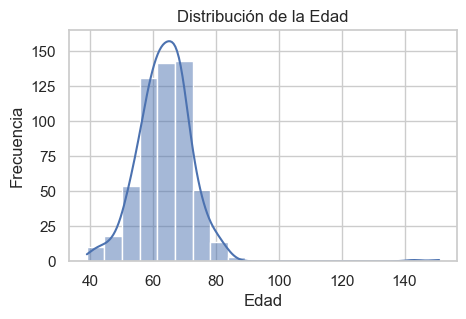

In [9]:
#Gráfico de distribución de la edad
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma de la columna 'edad'
plt.figure(figsize=(5, 3))
sns.histplot(df['EDAD'], bins=20, kde=True)  # kde=True añade la estimación de densidad
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

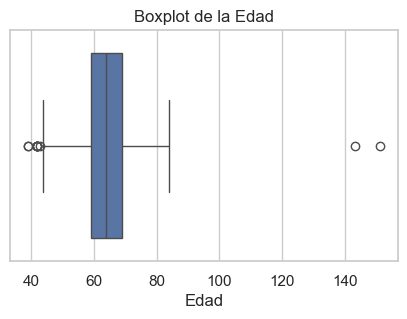

In [10]:
# Crear un boxplot de la columna 'edad'
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['EDAD'])
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

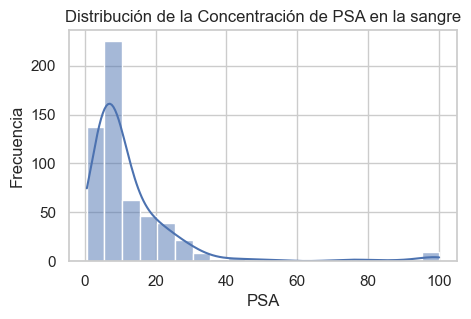

In [13]:
#Gráfico de distribución del PSA
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma de la columna 'PSA'
plt.figure(figsize=(5, 3))
sns.histplot(df['PSA'], bins=20, kde=True)  # kde=True añade la estimación de densidad
plt.title('Distribución de la Concentración de PSA en la sangre')
plt.xlabel('PSA')
plt.ylabel('Frecuencia')
plt.show()

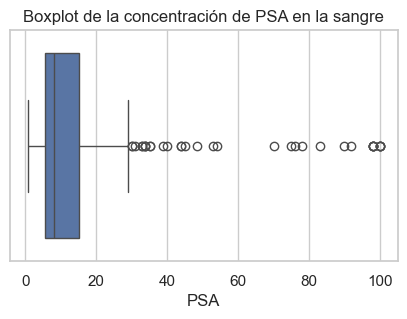

In [14]:
# Crear un boxplot de la columna 'PSA'
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['PSA'])
plt.title('Boxplot de la concentración de PSA en la sangre')
plt.xlabel('PSA')
plt.show()

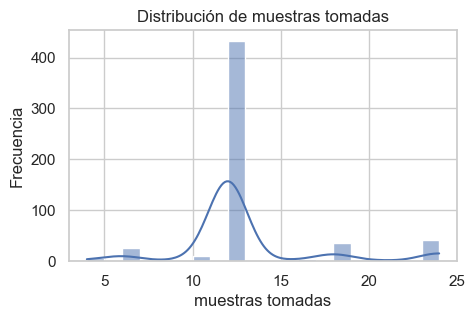

In [15]:
#Gráfico de distribución del número de muestras tomadas
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma de la columna 'NUMERO DE MUESTRAS TOMADAS'
plt.figure(figsize=(5, 3))
sns.histplot(df['NUMERO DE MUESTRAS TOMADAS'], bins=20, kde=True)  # kde=True añade la estimación de densidad
plt.title('Distribución de muestras tomadas')
plt.xlabel('muestras tomadas')
plt.ylabel('Frecuencia')
plt.show()

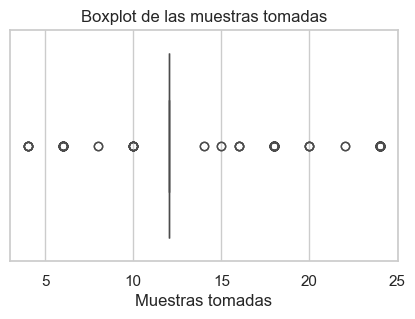

In [16]:
# Crear un boxplot de la columna 'NUMERO DE MUESTRAS TOMADAS'
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['NUMERO DE MUESTRAS TOMADAS'])
plt.title('Boxplot de las muestras tomadas')
plt.xlabel('Muestras tomadas')
plt.show()

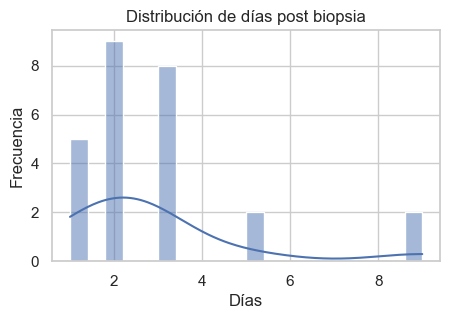

In [17]:
#Gráfico de distribución del número de días post Biopsias
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma de la columna 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
plt.figure(figsize=(5, 3))
sns.histplot(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], bins=20, kde=True)  # kde=True añade la estimación de densidad
plt.title('Distribución de días post biopsia')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

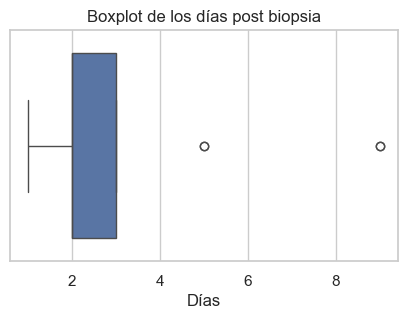

In [18]:
# Crear un boxplot de la columna 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'])
plt.title('Boxplot de los días post biopsia')
plt.xlabel('Días')
plt.show()

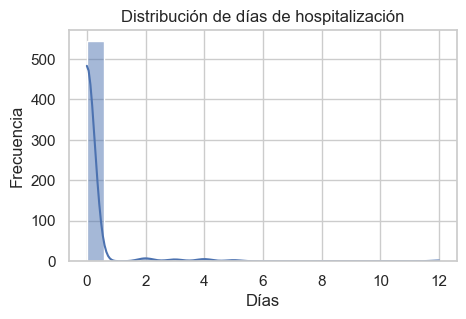

In [19]:
#Gráfico de distribución de los días de hospitalización MQ
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma de la columna 'DIAS HOSPITALIZACION MQ'
plt.figure(figsize=(5, 3))
sns.histplot(df['DIAS HOSPITALIZACION MQ'], bins=20, kde=True)  # kde=True añade la estimación de densidad
plt.title('Distribución de días de hospitalización')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

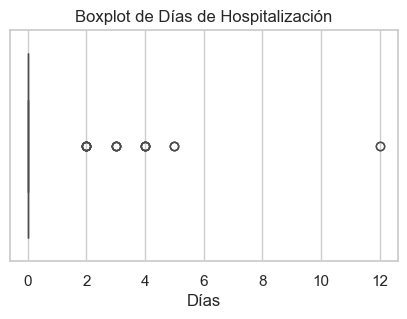

In [20]:
# Crear un boxplot de la columna 'DIAS HOSPITALIZACION MQ'
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['DIAS HOSPITALIZACION MQ'])
plt.title('Boxplot de Días de Hospitalización')
plt.xlabel('Días')
plt.show()

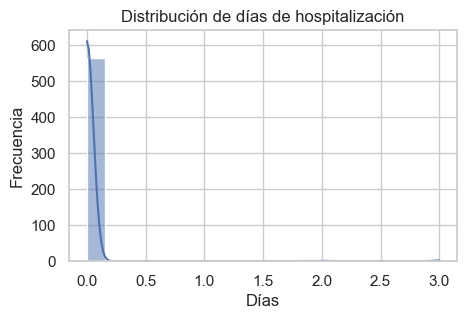

In [21]:
#Gráfico de distribución de los días de hospitalización UPC
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un histograma de la columna 'DÍAS HOSPITALIZACIÓN UPC'
plt.figure(figsize=(5, 3))
sns.histplot(df['DIAS HOSPITALIZACIÓN UPC'], bins=20, kde=True)  # kde=True añade la estimación de densidad
plt.title('Distribución de días de hospitalización')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

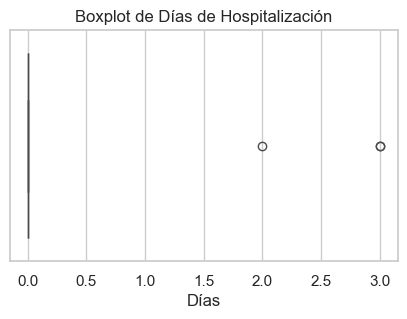

In [22]:
# Crear un boxplot de la columna 'DIAS HOSPITALIZACION UPC'
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['DIAS HOSPITALIZACIÓN UPC'])
plt.title('Boxplot de Días de Hospitalización')
plt.xlabel('Días')
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Si, se consiguió un paciente con una edad atípica de 151 años en el índice 181, y un paciente con la edad de 143 en el índice 161, se cree que pudo ser un error de tipeo, por eso en este caso se va a cambiar la edad de 151 años a 51 años.

In [37]:
# Filtrar el DataFrame por edad
edad_especifica = 151
fila_especifica = df[df['EDAD'] == edad_especifica]

print(f"\nFila con edad {edad_especifica}:")
print(fila_especifica)


Fila con edad 151:
      EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
181  151.0       NO                         NO  5.7               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
181                 SI                                   OTROS   

     NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
181                        12.0  NO                                NO     NEG   

     NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
181                                                NaN                           

    FIEBRE ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
181     NO  NO              NO             NO                    NO   

    HOSPITALIZACION  DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
181              NO                      0.0                       0.0  


In [38]:
# Cambiar la edad en la fila con índice 181 a 51
df.iloc[181, df.columns.get_loc('EDAD')] = 51

# Verificar la fila que se cambió
fila_cambiada = df.iloc[181]
print("\nFila después del cambio:")
print(fila_cambiada)


Fila después del cambio:
EDAD                                                                          51.0
DIABETES                                                                        NO
HOSPITALIZACIÓN ULTIMO MES                                                      NO
PSA                                                                            5.7
BIOPSIAS PREVIAS                                                                NO
VOLUMEN PROSTATICO                                                              SI
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      OTROS
NUMERO DE MUESTRAS TOMADAS                                                    12.0
CUP                                                                             NO
ENF. CRONICA PULMONAR OBSTRUCTIVA                                               NO
BIOPSIA                                                                        NEG
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓ

In [24]:
# Filtrar el DataFrame por edad
edad_especifica = 143
fila_especifica = df[df['EDAD'] == edad_especifica]

print(f"\nFila con edad {edad_especifica}:")
print(fila_especifica)


Fila con edad 143:
      EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES  PSA BIOPSIAS PREVIAS  \
161  143.0       SI                         NO  6.8               NO   

    VOLUMEN PROSTATICO ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  \
161                 NO          FLUOROQUINOLONA_AMINOGLICOSIDO   

     NUMERO DE MUESTRAS TOMADAS CUP ENF. CRONICA PULMONAR OBSTRUCTIVA BIOPSIA  \
161                        12.0  NO                                NO     NEG   

     NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  \
161                                                NaN                           

    FIEBRE ITU TIPO DE CULTIVO AGENTE AISLADO PATRON DE RESISTENCIA  \
161     NO  NO              NO             NO                    NO   

    HOSPITALIZACION  DIAS HOSPITALIZACION MQ  DIAS HOSPITALIZACIÓN UPC  
161              NO                      0.0                       0.0  


In [25]:
# Cambiar la edad en la fila con índice 161 a 43
df.iloc[161, df.columns.get_loc('EDAD')] = 43

# Verificar la fila que se cambió
fila_cambiada = df.iloc[161]
print("\nFila después del cambio:")
print(fila_cambiada)


Fila después del cambio:
EDAD                                                                                                   43.0
DIABETES                                                                                                 SI
HOSPITALIZACIÓN ULTIMO MES                                                                               NO
PSA                                                                                                     6.8
BIOPSIAS PREVIAS                                                                                         NO
VOLUMEN PROSTATICO                                                                                       NO
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      FLUOROQUINOLONA_AMINOGLICOSIDO
NUMERO DE MUESTRAS TOMADAS                                                                             12.0
CUP                                                                                                      NO
EN

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\2401378304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


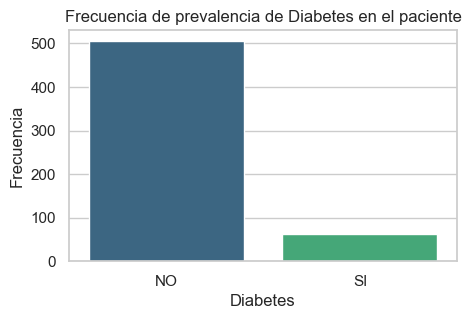

In [26]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'DIABETES'
frecuencia = df['DIABETES'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de prevalencia de Diabetes en el paciente')
plt.xlabel('Diabetes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [27]:
# Contar los valores en la columna 'HOSPITALIZACIÓN ULTIMO MES'
conteo_hospt_ult_mes = df['HOSPITALIZACIÓN ULTIMO MES'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'HOSPITALIZACIÓN ULTIMO MES':")
print(conteo_hospt_ult_mes)

Conteo de valores en la columna 'HOSPITALIZACIÓN ULTIMO MES':
HOSPITALIZACIÓN ULTIMO MES
NO    563
SI      5
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\911153064.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


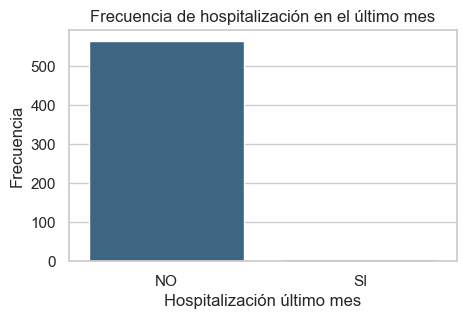

In [28]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'HOSPITALIZACIÓN ULTIMO MES'
frecuencia = df['HOSPITALIZACIÓN ULTIMO MES'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de hospitalización en el último mes')
plt.xlabel('Hospitalización último mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\3060960068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


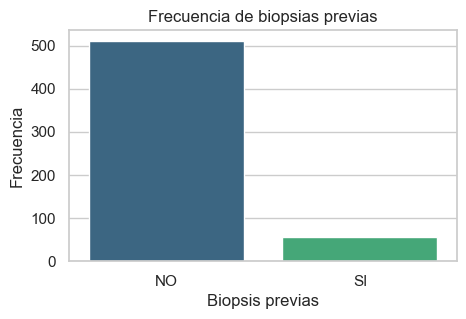

In [29]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'BIOPSIAS PREVIAS'
frecuencia = df['BIOPSIAS PREVIAS'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de biopsias previas')
plt.xlabel('Biopsis previas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\3265030863.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


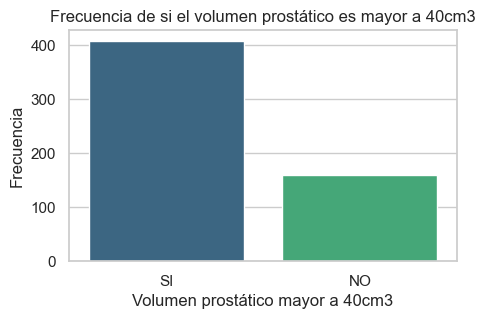

In [30]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'VOLUMEN PROSTATICO'
frecuencia = df['VOLUMEN PROSTATICO'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de si el volumen prostático es mayor a 40cm3')
plt.xlabel('Volumen prostático mayor a 40cm3')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [31]:
# Contar los valores en la columna 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'
conteo_ant_profi = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS':")
print(conteo_ant_profi)

Conteo de valores en la columna 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS':
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    448
CEFALOSPORINA_AMINOGLUCOCIDO       56
OTROS                              42
OROQUINOLONAS                      18
FLUOROQUINOLONA_AMINOGLICÓSIDO      4
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\3485938618.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


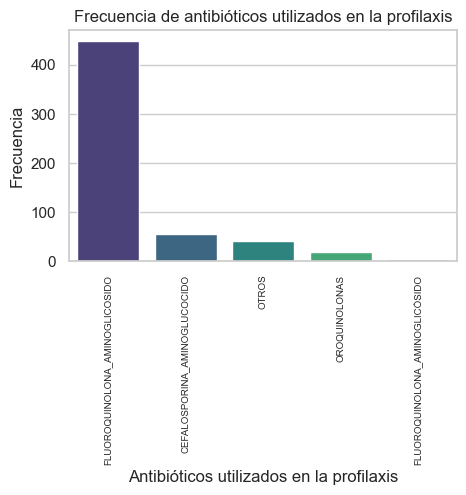

In [32]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'
frecuencia = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de antibióticos utilizados en la profilaxis')
plt.xlabel('Antibióticos utilizados en la profilaxis')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [33]:
# Contar los valores en la columna 'CUP'
conteo_cup = df['CUP'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'CUP':")
print(conteo_cup)

Conteo de valores en la columna 'CUP':
CUP
NO    563
SI      4
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\2008452572.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


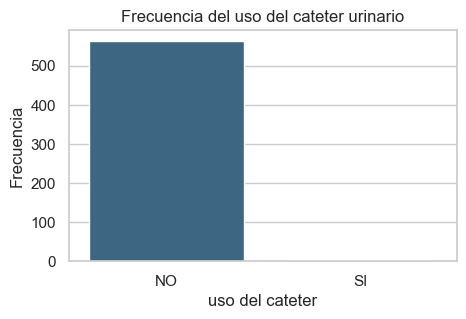

In [34]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'CUP'
frecuencia = df['CUP'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia del uso del cateter urinario')
plt.xlabel('uso del cateter')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [35]:
# Contar los valores en la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
conteo_enf_cron = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA':")
print(conteo_enf_cron)

Conteo de valores en la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA':
ENF. CRONICA PULMONAR OBSTRUCTIVA
NO          546
SI           12
SI, EPOC      4
SI, ASMA      4
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\3543360403.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


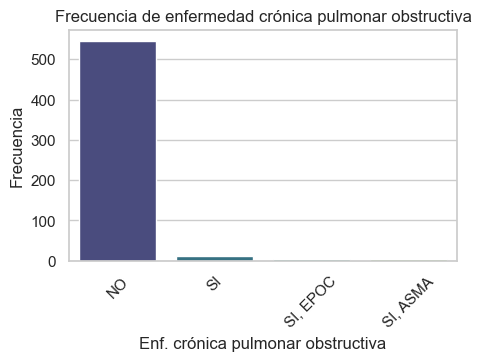

In [36]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
frecuencia = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de enfermedad crónica pulmonar obstructiva')
plt.xlabel('Enf. crónica pulmonar obstructiva')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Contar los valores en la columna 'BIOPSIA'
conteo_biopsia = df['BIOPSIA'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'BIOPSIA':")
print(conteo_biopsia)

Conteo de valores en la columna 'BIOPSIA':
BIOPSIA
NEG                                           322
ADENOCARCINOMA GLEASON 7                      106
ADENOCARCINOMA GLEASON 6                       38
ADENOCARCINOMA GLEASON 8                       22
ADENOCARCINOMA GLEASON 9                       20
ADENOCARCINOMA GLEASON 6                       16
PROSTATITIS                                    14
HIPERPLASIA PROSTATICA                         14
ADENOCARCINOMA GLEASON 7                       10
ADENOCARCINOMA GLEASON 10                       4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\3715517923.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


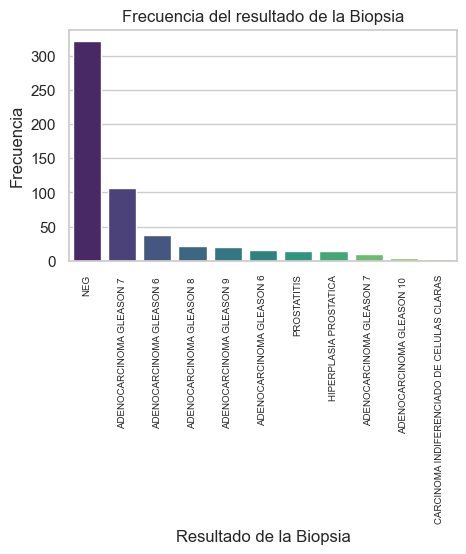

In [38]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'BIOPSIA'
frecuencia = df['BIOPSIA'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia del resultado de la Biopsia')
plt.xlabel('Resultado de la Biopsia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=7)
plt.show()

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\146302361.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


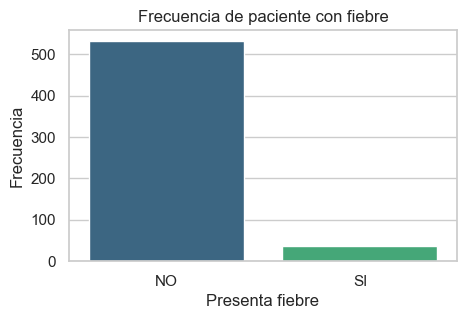

In [39]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'FIEBRE'
frecuencia = df['FIEBRE'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de paciente con fiebre')
plt.xlabel('Presenta fiebre')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [40]:
# Contar los valores en la columna 'ITU'
conteo_itu = df['ITU'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'ITU':")
print(conteo_itu)

Conteo de valores en la columna 'ITU':
ITU
NO    562
SI      6
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\2631005200.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


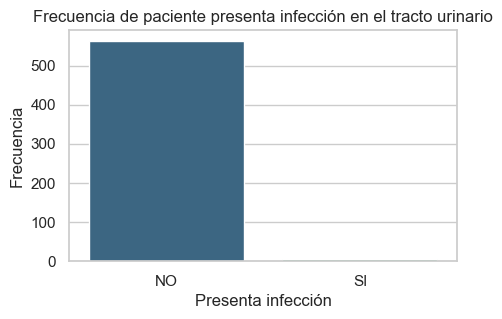

In [41]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'ITU'
frecuencia = df['ITU'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de paciente presenta infección en el tracto urinario')
plt.xlabel('Presenta infección')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [42]:
# Contar los valores en la columna 'TIPO DE CULTIVO'
conteo_tipo_cultivo = df['TIPO DE CULTIVO'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'TIPO DE CULTIVO':")
print(conteo_tipo_cultivo)

Conteo de valores en la columna 'TIPO DE CULTIVO':
TIPO DE CULTIVO
NO                          560
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\493514482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


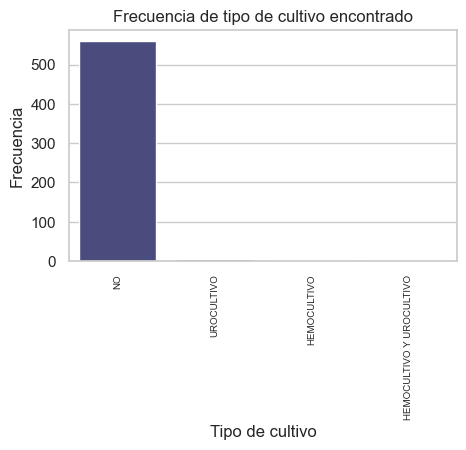

In [43]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'TIPO DE CULTIVO'
frecuencia = df['TIPO DE CULTIVO'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de tipo de cultivo encontrado')
plt.xlabel('Tipo de cultivo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [44]:
# Contar los valores en la columna 'AGENTE AISLADO'
conteo_agente = df['AGENTE AISLADO'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'AGENTE AISLADO':")
print(conteo_agente)

Conteo de valores en la columna 'AGENTE AISLADO':
AGENTE AISLADO
NO                        543
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\1321411937.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


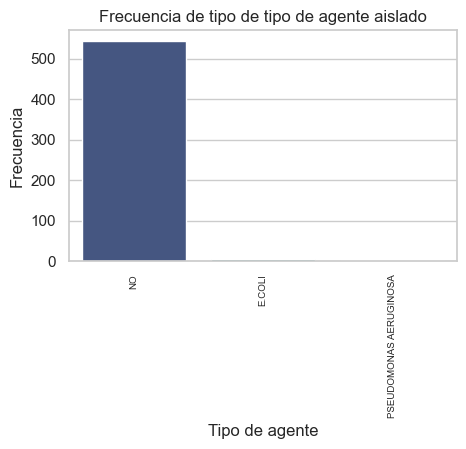

In [45]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'AGENTE AISLADO'
frecuencia = df['AGENTE AISLADO'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de tipo de tipo de agente aislado')
plt.xlabel('Tipo de agente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=7)
plt.show()

In [46]:
# Contar los valores en la columna 'PATRON DE RESISTENCIA'
conteo_patron = df['PATRON DE RESISTENCIA'].value_counts()

# Mostrar el conteo de valores
print("Conteo de valores en la columna 'PATRON DE RESISTENCIA':")
print(conteo_patron)

Conteo de valores en la columna 'PATRON DE RESISTENCIA':
PATRON DE RESISTENCIA
NO                                                                                 561
RESISTENTE A AMPI, CIPRO Y GENTA                                                     2
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA      2
MULTI SENSIBLE                                                                       2
 AMPI R, CIPRO R, GENTA R, SULFA M R                                                 1
Name: count, dtype: int64


C:\Users\guard\AppData\Local\Temp\ipykernel_18032\3275520389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


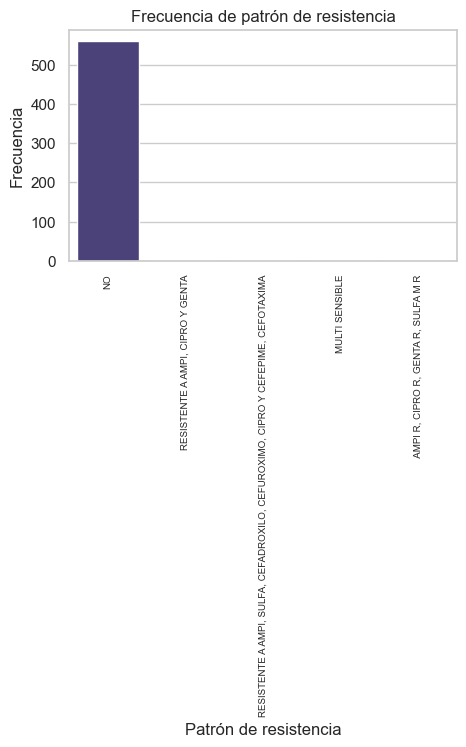

In [47]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'PATRON DE RESISTENCIA'
frecuencia = df['PATRON DE RESISTENCIA'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de patrón de resistencia')
plt.xlabel('Patrón de resistencia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, fontsize=7)
plt.show()

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\618306212.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')


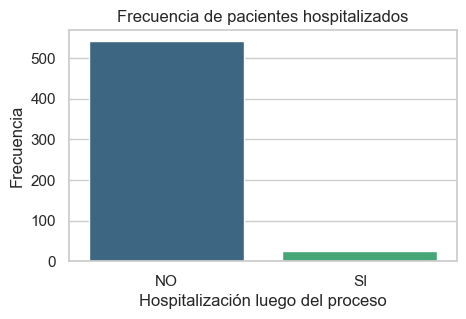

In [48]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría en 'HOSPITALIZACION'
frecuencia = df['HOSPITALIZACION'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette='viridis')
plt.title('Frecuencia de pacientes hospitalizados')
plt.xlabel('Hospitalización luego del proceso')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [49]:
# Revisamos el número de los valores nulos por columna
df.isnull().sum()

EDAD                                                                           2
DIABETES                                                                       2
HOSPITALIZACIÓN ULTIMO MES                                                     2
PSA                                                                            6
BIOPSIAS PREVIAS                                                               4
VOLUMEN PROSTATICO                                                             3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                        2
NUMERO DE MUESTRAS TOMADAS                                                     2
CUP                                                                            3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                              4
BIOPSIA                                                                        2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    544
FIEBRE                      

In [50]:
# Reemplazar valores nulos de la columna 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' por cero (0)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].fillna(0, inplace=True)

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\609953942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].fillna(0, inplace=True)


In [51]:
# Revisamos el número de los valores nulos por columna
df.isnull().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

In [52]:
#Revisamos la cola de la base de datos para ver si se encuentra alguna anomalía
df.tail()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,0.0,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Eliminar las filas con índices 568 y 569 porque están vacías
df.drop(index=[568, 569], inplace=True)

In [54]:
#Revisamos nuevamente el dataframe
df.tail()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,0.0,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,0.0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [55]:
# Revisamos nuevamente el número de los valores nulos por columna
df.isnull().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

In [56]:
# Reemplazar valores nulos en las columnas 'HOSPITALIZACION', 'PATRON DE RESISTENCIA', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'CUP', 'VOLUMEN PROSTATICO' y 'BIOPSIAS PREVIAS' con "NO"
df[['HOSPITALIZACION', 'PATRON DE RESISTENCIA', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'CUP', 'VOLUMEN PROSTATICO', 'BIOPSIAS PREVIAS']] = df[['HOSPITALIZACION', 'PATRON DE RESISTENCIA', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'CUP', 'VOLUMEN PROSTATICO', 'BIOPSIAS PREVIAS']].fillna('NO')

In [57]:
# Reemplazar valores nulos de PSA por el promedio
psa_prom = df['PSA'].mean()
df['PSA'].fillna(psa_prom, inplace=True)

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\1885609189.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PSA'].fillna(psa_prom, inplace=True)


In [58]:
# Filtrar filas donde la columna 'AGENTE AISLADO' es nula para observar si se puede aplicar lo mismo que en las otras columnas
filas_nulas = df[df['AGENTE AISLADO'].isnull()]

print("\nFilas donde la columna 'AGENTE AISLADO' es nula:")
print(filas_nulas)


Filas donde la columna 'AGENTE AISLADO' es nula:
     EDAD DIABETES HOSPITALIZACIÓN ULTIMO MES    PSA BIOPSIAS PREVIAS  \
26   75.0       NO                         NO  25.00               NO   
99   70.0       NO                         NO   7.20               NO   
106  65.0       NO                         NO   5.97               NO   
115  56.0       NO                         NO   4.00               NO   
116  55.0       NO                         NO  17.00               NO   
126  74.0       NO                         NO   8.00               NO   
128  69.0       NO                         NO  13.40               SI   
129  63.0       NO                         NO  11.00               NO   
130  63.0       NO                         NO  21.30               SI   
138  64.0       NO                         NO  15.60               NO   
139  71.0       NO                         NO   5.40               NO   
146  58.0       NO                         NO  17.00               NO   
1

In [59]:
# Reemplazar valores nulos en la columna 'AGENTE AISLADO' con "NO"
df[['AGENTE AISLADO']] = df[['AGENTE AISLADO']].fillna('NO')

In [60]:
# Revisamos nuevamente el número de los valores nulos por columna
df.isnull().sum()

EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                      0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                              

In [61]:
# Reemplazar "SI, EPOC" por "SI" en la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 'SI', inplace=True)

# Reemplazar "SI, EPOC" por "SI" en la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA', 'SI', inplace=True)

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\317625023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 'SI', inplace=True)
C:\Users\guard\AppData\Local\Temp\ipykernel_18032\317625023.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [62]:
# Reemplazar "ADENOCARCINOMA GLEASON 7 " por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 7 ', 'POS', inplace=True)

# Reemplazar "ADENOCARCINOMA GLEASON 6" por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 6 ', 'POS', inplace=True)

# Reemplazar "ADENOCARCINOMA GLEASON 8" por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 8 ', 'POS', inplace=True)

# Reemplazar "ADENOCARCINOMA GLEASON 9" por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 9 ', 'POS', inplace=True)

# Reemplazar "PROSTATITIS" por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('PROSTATITIS', 'POS', inplace=True)

# Reemplazar "HIPERPLASIA PROSTATICA" por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('HIPERPLASIA PROSTATICA', 'POS', inplace=True)

# Reemplazar "ADENOCARCINOMA GLEASON 10" por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 10 ', 'POS', inplace=True)

# Reemplazar "CARCINOMA INDIFERENCIADO DE CELULAS CLARAS" por "POS" en la columna 'BIOPSIA'
df['BIOPSIA'].replace('CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', 'POS', inplace=True)

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\2247033467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BIOPSIA'].replace('ADENOCARCINOMA GLEASON 7 ', 'POS', inplace=True)
C:\Users\guard\AppData\Local\Temp\ipykernel_18032\2247033467.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [63]:
# Reemplazar "RESISTENTE A AMPI, CIPRO Y GENTA" por "SI" en la columna 'PATRON DE RESISTENCIA'
df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 'SI', inplace=True)

# Reemplazar "RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA" por "SI" en la columna 'PATRON DE RESISTENCIA'
df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 'SI', inplace=True)

# Reemplazar "MULTI SENSIBLE" por "SI" en la columna 'PATRON DE RESISTENCIA'
df['PATRON DE RESISTENCIA'].replace('MULTI SENSIBLE', 'SI', inplace=True)

# Reemplazar "MULTI SENSIBLE" por "SI" en la columna 'PATRON DE RESISTENCIA'
df['PATRON DE RESISTENCIA'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R', 'SI', inplace=True)

C:\Users\guard\AppData\Local\Temp\ipykernel_18032\2467274919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 'SI', inplace=True)
C:\Users\guard\AppData\Local\Temp\ipykernel_18032\2467274919.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Sí es necesario normalizar porque las variables se mueven en rangos diferentes y se pudiesen generar distorsiones en el análisis.

In [64]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [65]:
# 1. Convertir variables categóricas a numéricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['DIABETES','HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU', 'HOSPITALIZACION', 'PATRON DE RESISTENCIA'], drop_first=True)

# 2. Normalizar las variables numéricas
scaler = MinMaxScaler()
df_encoded[['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']] = scaler.fit_transform(df_encoded[['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS', 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']])

print("\nDataFrame después de convertir categóricos a numéricos y normalizar:")
df_encoded.head()


DataFrame después de convertir categóricos a numéricos y normalizar:


,EDAD,PSA,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,TIPO DE CULTIVO,AGENTE AISLADO,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,DIABETES_SI,...,VOLUMEN PROSTATICO_SI,CUP_SI,ENF. CRONICA PULMONAR OBSTRUCTIVA_SI,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_NEG,BIOPSIA_POS,FIEBRE_SI,ITU_SI,HOSPITALIZACION_SI,PATRON DE RESISTENCIA_SI
0,0.125000,0.034205,FLUOROQUINOLONA_AMINOGLICOSIDO,0.4,0.111111,NO,NO,0.166667,0.0,False,...,True,False,False,False,True,False,True,False,True,False
1,0.151786,0.071429,FLUOROQUINOLONA_AMINOGLICOSIDO,0.4,0.111111,NO,NO,0.416667,0.0,False,...,True,False,False,False,True,False,True,False,True,False
2,0.160714,0.285714,FLUOROQUINOLONA_AMINOGLICOSIDO,1.0,0.111111,HEMOCULTIVO,E.COLI,0.333333,1.0,False,...,True,False,False,False,True,False,True,False,True,True
3,0.151786,0.064386,FLUOROQUINOLONA_AMINOGLICOSIDO,0.4,0.111111,NO,NO,0.416667,0.0,False,...,True,False,False,False,True,False,True,False,True,False
4,0.142857,0.285714,FLUOROQUINOLONA_AMINOGLICOSIDO,1.0,0.111111,HEMOCULTIVO,E.COLI,0.333333,1.0,False,...,True,False,False,False,True,False,True,False,True,False


In [66]:
# Eliminar columnas 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'TIPO DE CULTIVO' y 'AGENTE AISLADO'
df_dropped = df_encoded.drop(columns=['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'TIPO DE CULTIVO', 'AGENTE AISLADO'])

print("\nDataFrame después de eliminar columnas:")
df_dropped.head()


DataFrame después de eliminar columnas:


,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,DIABETES_SI,HOSPITALIZACIÓN ULTIMO MES_SI,BIOPSIAS PREVIAS_SI,VOLUMEN PROSTATICO_SI,CUP_SI,ENF. CRONICA PULMONAR OBSTRUCTIVA_SI,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_NEG,BIOPSIA_POS,FIEBRE_SI,ITU_SI,HOSPITALIZACION_SI,PATRON DE RESISTENCIA_SI
0,0.125000,0.034205,0.4,0.111111,0.166667,0.0,False,False,False,True,False,False,False,True,False,True,False,True,False
1,0.151786,0.071429,0.4,0.111111,0.416667,0.0,False,False,False,True,False,False,False,True,False,True,False,True,False
2,0.160714,0.285714,1.0,0.111111,0.333333,1.0,False,False,True,True,False,False,False,True,False,True,False,True,True
3,0.151786,0.064386,0.4,0.111111,0.416667,0.0,False,False,False,True,False,False,False,True,False,True,False,True,False
4,0.142857,0.285714,1.0,0.111111,0.333333,1.0,False,False,True,True,False,False,False,True,False,True,False,True,False


Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Dado a que el cliente desea saber las características de los pacientes que terminan es hospitalización a partir del análisis de correlación que se muestra a continuación, se tomará sólo las variables altamente correlacionadas (positiva o negativamente) con la Hospitalización para realizar los modelos, las variables muy cercanas a cero (0) serán descartadas porque estadísticamente no tienen relevancia al momento de que un paciente sea hospitalizado.

In [67]:
# Crear la matriz de correlación
correlation_matrix = df_dropped.corr()

print("\nMatriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
                                                        EDAD       PSA  \
EDAD                                                1.000000  0.158412   
PSA                                                 0.158412  1.000000   
NUMERO DE MUESTRAS TOMADAS                         -0.189727 -0.203618   
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA ...  0.047826 -0.053949   
DIAS HOSPITALIZACION MQ                            -0.031149 -0.033121   
DIAS HOSPITALIZACIÓN UPC                           -0.032621  0.043941   
DIABETES_SI                                         0.105362 -0.024502   
HOSPITALIZACIÓN ULTIMO MES_SI                      -0.024975 -0.037765   
BIOPSIAS PREVIAS_SI                                -0.084525 -0.038473   
VOLUMEN PROSTATICO_SI                               0.248277  0.130402   
CUP_SI                                              0.118988  0.088824   
ENF. CRONICA PULMONAR OBSTRUCTIVA_SI                0.103060  0.204741   
BIOPSIA_ADENOC

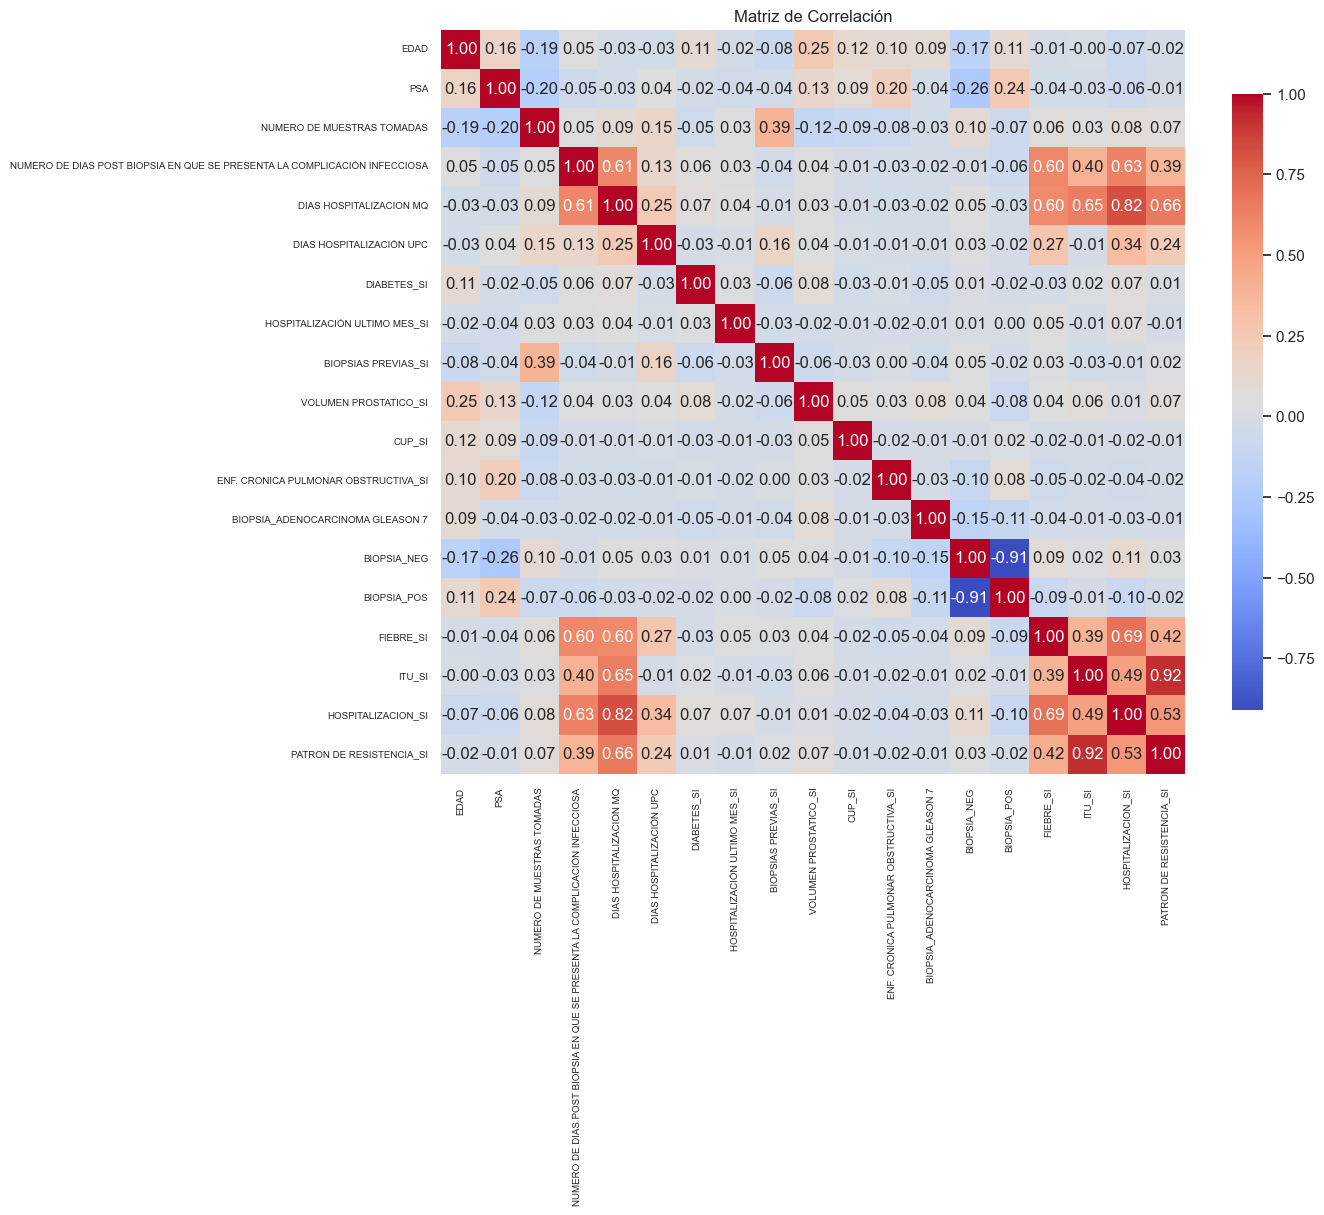

In [68]:
# Graficar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.xticks(fontsize=7)  # Ajustar el tamaño de las etiquetas del eje x
plt.yticks(fontsize=7)  # Ajustar el tamaño de las etiquetas del eje y
plt.show()

In [69]:
# Eliminar columnas
df_dropped_2 = df_dropped.drop(columns=['EDAD', 'PSA', 'NUMERO DE MUESTRAS TOMADAS', 'DIABETES_SI', 'HOSPITALIZACIÓN ULTIMO MES_SI', 'BIOPSIAS PREVIAS_SI', 'VOLUMEN PROSTATICO_SI', 'CUP_SI', 'ENF. CRONICA PULMONAR OBSTRUCTIVA_SI', 'BIOPSIA_ADENOCARCINOMA GLEASON 7'])

print("\nDataFrame después de eliminar columnas:")
df_dropped_2.head()


DataFrame después de eliminar columnas:


,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,BIOPSIA_NEG,BIOPSIA_POS,FIEBRE_SI,ITU_SI,HOSPITALIZACION_SI,PATRON DE RESISTENCIA_SI
0,0.111111,0.166667,0.0,True,False,True,False,True,False
1,0.111111,0.416667,0.0,True,False,True,False,True,False
2,0.111111,0.333333,1.0,True,False,True,False,True,True
3,0.111111,0.416667,0.0,True,False,True,False,True,False
4,0.111111,0.333333,1.0,True,False,True,False,True,False


Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [70]:
df_dropped_2

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,BIOPSIA_NEG,BIOPSIA_POS,FIEBRE_SI,ITU_SI,HOSPITALIZACION_SI,PATRON DE RESISTENCIA_SI
0,0.111111,0.166667,0.0,True,False,True,False,True,False
1,0.111111,0.416667,0.0,True,False,True,False,True,False
2,0.111111,0.333333,1.0,True,False,True,False,True,True
3,0.111111,0.416667,0.0,True,False,True,False,True,False
4,0.111111,0.333333,1.0,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...
563,0.000000,0.000000,0.0,False,False,False,False,False,False
564,0.000000,0.000000,0.0,False,True,False,False,False,False
565,0.000000,0.000000,0.0,True,False,False,False,False,False
566,0.000000,0.000000,0.0,False,True,False,False,False,False


In [71]:
# Exportar el DataFrame a un archivo CSV
df_dropped_2.to_csv('BBDD_Hospitalización.csv', index=False)  # index=False para no incluir el índice en el archivo CSV